#### [ 개발 주제 : 꽃 받침/잎 길이에 따른 너비 예측 모델 ]
- 데이터셋 : iris.csv
	* 피처/특성/데이터 : 길이 Length 컬럼
	* 타겟/정답/레이블 : 너비 Width 컬럼
- 학습종류 : 지도학습 - 회귀(Regression)
- 알고리즘 : 데이터셋 분석 후 결정

In [1]:
## [1-1] 모듈로딩 - 데이터 분석용
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## [1-2] 데이터 준비
DATA2 = '../data/iris.csv'

In [5]:
## - 데이터 로딩
DF = pd.read_csv(DATA2, usecols=[0, 1, 2, 3], engine='python')
DF

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


[2] 데이터 분석 - 탐색적 분석 <hr>

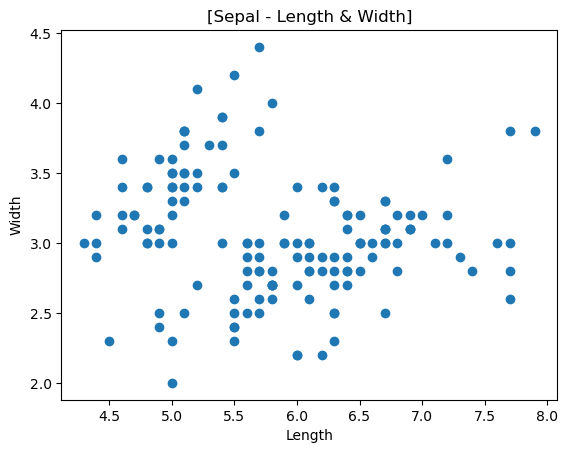

In [9]:
## - 줄기의 무게와 너비의 분포 시각화
plt.plot(DF['sepal.length'], DF['sepal.width'], 'o')
plt.xlabel('Length')
plt.ylabel('Width')
plt.title('[Sepal - Length & Width]')
plt.show()

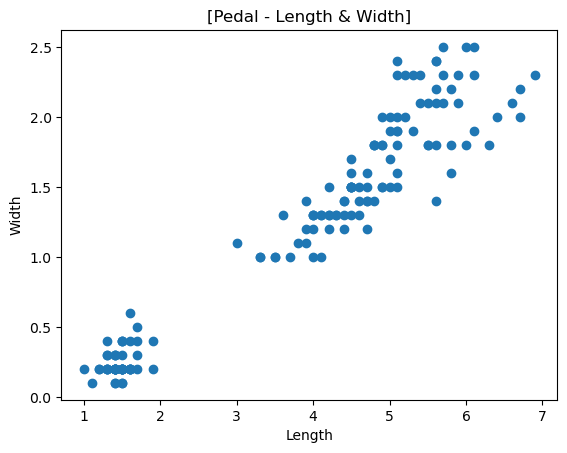

In [10]:
## - 잎의 무게와 너비의 분포 시각솨
plt.plot(DF['petal.length'], DF['petal.width'], 'o')
plt.xlabel('Length')
plt.ylabel('Width')
plt.title('[Pedal - Length & Width]')
plt.show()

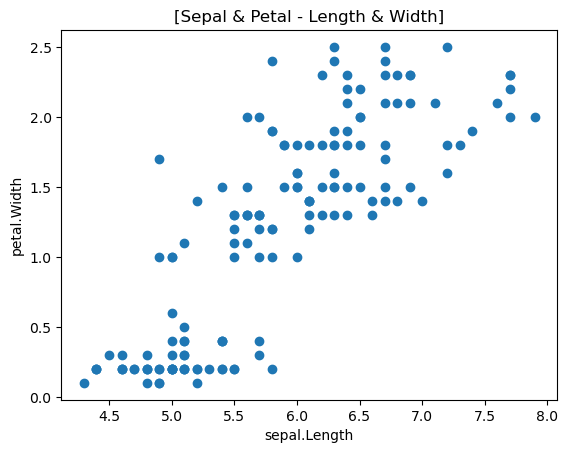

In [13]:
## 줄기의 길이와 잎의 너비의 분포 시각화 
plt.plot(DF['sepal.length'], DF['petal.width'], 'o')
plt.xlabel('sepal.Length')
plt.ylabel('petal.Width')
plt.title('[Sepal & Petal - Length & Width]')
plt.show()

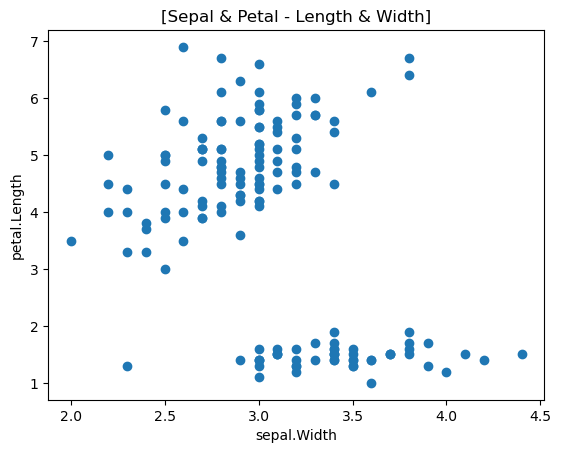

In [16]:
## 줄기의 너비와 잎의 길이의 분포 시각화
plt.plot(DF['sepal.width'], DF['petal.length'], 'o')
plt.xlabel('sepal.Width')
plt.ylabel('petal.Length')
plt.title('[Sepal & Petal - Length & Width]')
plt.show()

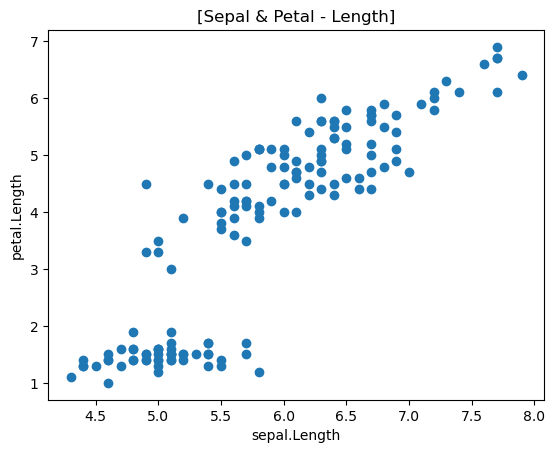

In [17]:
## 줄기의 길이와 잎의 길이의 분포 시각화
plt.plot(DF['sepal.length'], DF['petal.length'], 'o')
plt.xlabel('sepal.Length')
plt.ylabel('petal.Length')
plt.title('[Sepal & Petal - Length]')
plt.show()

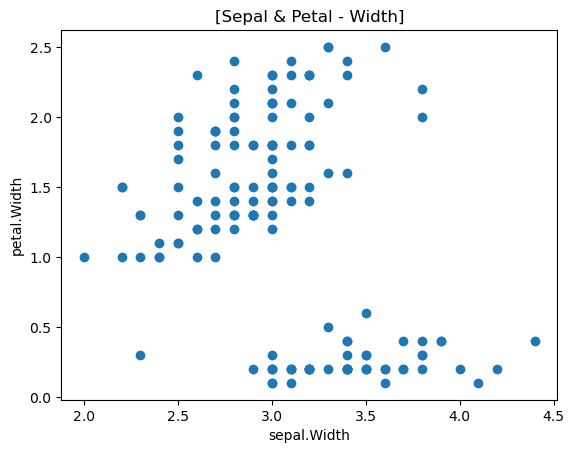

In [18]:
## 줄기의 너비와 잎의 너비의 분포 시각화
plt.plot(DF['sepal.width'], DF['petal.width'], 'o')
plt.xlabel('sepal.Width')
plt.ylabel('petal.Width')
plt.title('[Sepal & Petal - Width]')
plt.show()

[2] 학습 진행 <hr>

In [19]:
##  학습관련 모듈로딩
from sklearn.linear_model import LinearRegression						## ML 알고리즘 모듈
from sklearn.metrics import mean_squared_error, mean_absolute_error 	## 성능평가 관련 모듈
from sklearn.model_selection import train_test_split					## 데이터셋 분리 관련 모듈

In [20]:
## [3-1] 데이터셋 준비 => 학습용, 검증용 ,테스트용
## - 학습용   : 모델 학습 즉, 규칙과 패턴 찾기 위해 사용되는 데이터셋
## - 검증용   : 모델 학습 진행이 제대로 되고 있느닞 확인용 데이터셋
## - 테스트용 : 학습 완료 후 검사용 데이터셋

## - 전체 데이터셋 => 학습용 : 테스트용 = 70:30 또는 80:20
feature = DF[['sepal.length', 'sepal.width', 'petal.length']]
target = DF['petal.width']
print(f'feature => {feature.ndim}D target => {target.ndim}D')

feature => 2D target => 1D


In [21]:
# 학습용 : 테스트용 = 80:20
X2_train, X2_test, y2_train, y2_test = train_test_split(feature,
														target,
														test_size=0.2,
														random_state=20)

print(f'X2_train => {X2_train.shape}, X2_test => {X2_test.shape}')
print(f'y2_train => {y2_train.shape}, y2_test => {y2_test.shape}')

X2_train => (120, 3), X2_test => (30, 3)
y2_train => (120,), y2_test => (30,)


In [24]:
## [3-2] 학습 진행 => 알고리즘객체 생성
Model = LinearRegression()

In [25]:
print(DF.dtypes)

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
dtype: object


In [26]:
## [3-3] 학습 진행 => 학습용 데이터셋 사용
Model.fit(X2_train, y2_train)

LinearRegression()

In [27]:
## 모델 파라미터 확인
print(f'coef_ : {Model.coef_}, intercept_ : {Model.intercept_}')

coef_ : [-0.13888185  0.16848595  0.49643256], intercept_ : -0.3579429370550373


In [28]:
y2_pred = Model.predict(X2_test)

In [29]:
print(f'Model MSE : {mean_squared_error(y2_test, y2_pred):.4f}')

Model MSE : 0.0444


입력값 예측

In [31]:
print('(sepal.length, sepal.width, petal.length -> petal.width) 예측')
sepal_length = float(input('예측할 sepal.length 값 입력 :'))
sepal_width = float(input('예측할 sepal.width 값 입력 :'))
petal_length = float(input('예측할 petal.length 값 입력 :'))
petal_pred = Model.predict([[sepal_length, sepal_width, petal_length]])
print(f'petal.width 예측: {petal_pred[0]:.4f}')

(sepal.length, sepal.width, petal.length -> petal.width) 예측
petal.width 예측: 7.1158


c:\Users\KDP-35\anaconda3\envs\ML_PY39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
